# Profile Vacancies recommendation engine

## Context

The notebook has been created in the context of a a "Postgraduate Studies in Big Data & Analytics in Business and Management". 

It has been based on the code snippets of jalajthanaki, which created the main part of the code.
https://github.com/jalajthanaki/Job_recommendation_engine 
I modified it a bit to cater for my own dataset.



## Importing libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ast 
import os
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.model_selection import train_test_split

import warnings; warnings.simplefilter('ignore')

## Load dataset

In [2]:
# Set the working dir
os.chdir(r'C:\Users\woutv\Jupyter\Jobs\inputdata')
# List the data
# os.listdir()

In [3]:
apps = pd.read_csv('./ProfielSolicitaties.csv', delimiter=';',encoding='utf-8')
jobs = pd.read_csv('./Vacatures.csv', delimiter=';',encoding='utf-8')
users = pd.read_csv('./ProfielenMetCV.csv' ,delimiter=';',encoding='utf-8')
# test_users = pd.read_csv('./inputdata/test_users.tsv', delimiter='\t',encoding='utf-8')

## Split training and testing data

### split data

In [4]:
apps_training, apps_testing = train_test_split(apps, test_size = 0.2)


## Checking some data

### Checking on how many times a vacancy had a profile or the other way around

In [5]:
apps['rating']=apps.apply(lambda row:1, axis=1)
apps.groupby(['VacatureId']).sum().sort_values(by=['rating'],ascending=False)


,ProfielSolicitatieId,ProfielId,SolicitatieStatus,Beantwoord,rating
VacatureId,,,,,
9445,1404593,1182649,0,False,153
7695,578500,542091,0,False,135
9356,1143345,1042224,0,False,129
12943,1736543,1593777,0,False,125
8709,721807,677130,0,False,119
9390,1078371,940941,0,False,118
12903,1609293,1361959,0,False,115
12891,1397133,1230204,0,False,102
5997,145571,132433,0,False,100


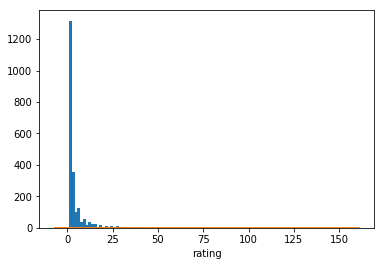

In [10]:
hist = apps.groupby(['VacatureId']).sum()

plt.hist(hist.rating, bins=100)
sns.distplot(hist.rating);

In [166]:
apps.groupby(['ProfielId']).sum().sort_values(by=['rating'],ascending=False)


,ProfielSolicitatieId,VacatureId,SolicitatieStatus,Beantwoord,rating
ProfielId,,,,,
3424,100081,186794,0,False,28
6303,289502,236489,0,False,27
829,25887,143296,0,False,21
830,25074,144032,0,False,21
8800,155517,140243,0,False,16
1091,17148,109321,0,False,15
1124,36789,102327,0,False,15
2271,28578,77901,0,False,12
1826,21076,82208,0,False,11


## Approach 1


###  Look for similar jobs
Simple approach to get similar jobs

In [12]:
# check the columns of the document to see with what we can work.
jobs.columns
# jobs.head

Index(['VacatureId', 'OrgineleId', 'Naam', 'Ref', 'Datum', 'Plaats',
       'Postcode', 'Type', 'Kantoor', 'Contactpersoon', 'Contactnummer',
       'Contactemail', 'Functie', 'Takenprofiel', 'Attesten', 'Vaardigheden',
       'Opleiding', 'Vakkennis', 'Ervaring', 'Talenkennis', 'Pckennis', 'Taal',
       'Duur', 'SolicitatieTypeStatus', 'FunctiegroepId', 'Database', 'Lat',
       'Lon', 'IsDeleted', 'IngaveDatum'],
      dtype='object')

In [13]:
# Concatenate different items which are relevant.
jobs['Naam'] = jobs['Naam'].fillna('')
jobs['Functie'] = jobs['Functie'].fillna('')
jobs['Takenprofiel'] = jobs['Takenprofiel'].fillna('')
jobs['NFT'] = jobs['Naam'] + jobs['Functie'] + jobs['Takenprofiel']

In [21]:
# Remove irrelevant words
from stop_words import get_stop_words
stops_words_dutch = get_stop_words('dutch')
stops_words_french = get_stop_words('french')
stops_words_df = stops_words_dutch + stops_words_french
# print(stops_words_df)
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words=stops_words_df)

# create a matrix with the word as features (columns) and the documents as rows. The values are the Tf-idf-weights
tfidf_matrix = tf.fit_transform(jobs['NFT'])
## print (tf.get_feature_names())
tfidf_matrix

<8356x133543 sparse matrix of type '<class 'numpy.float64'>'
	with 423368 stored elements in Compressed Sparse Row format>

In [22]:
# Calculating the cosine simularity of the corpus
# A nice explanation of how this works can be found here : 
# http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [23]:
cosine_sim[0]
jobs.index

RangeIndex(start=0, stop=8356, step=1)

In [24]:
# Creating a pandas serie which will hold a list with the names of the documents and the index. This index will be used to
# retrieve the index, based on the title of the job. This in its turn is then used to lookup documents in the cosine matrix
jobs = jobs.reset_index()
titles = jobs['Naam']
indices = pd.Series(jobs.index, index=jobs['Naam'])
# print(indices)

In [19]:
def get_recommendations(title):
    if title in indices:
        idx = indices[title]
        # Create an iteratable list from the matrix and getting the row that corresponds with the document. This row 
        # contains all comparisons for this document with the rest of the documents
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        job_indices = [i[0] for i in sim_scores]
        return titles.iloc[job_indices].head(10)
    else:
        return 'Not a known vacancy'

In [33]:
# In the example 1 the results look a bit strange. It seems that the ‘Batibouwverkoper’ a sales profile is similar to 
# ‘Ervaren vloerders’, which is an installation profile. Looking in the details of the vacancies it became clear that
# in the task profile both vacancies was stated that knowledge of ‘ceramic tiles or natural stones‘ is needed. 
get_recommendations('BATIBOUWVERKOPERS')

8349                          BATIBOUWVERKOPERS
2957                           ERVAREN VLOERDER
5698                           ERVAREN VLOERDER
6244                           ERVAREN VLOERDER
8104          INFORMANT AUTOSALON 2019 - TIENEN
8109            INFORMANT AUTOSALON 2019 - GENK
8110            INFORMANT AUTOSALON 2019 - BREE
8111    INFORMANT AUTOSALON 2019 - SINT-TRUIDEN
8103         INFORMANT AUTOSALON 2019 - WEEKEND
8106           HOSTESS AUTOSALON 2019 - WEEKEND
Name: Naam, dtype: object

In [18]:
get_recommendations('VENDEUR CONSEILLER')

8342                VENDEUR CONSEILLER
8222                VENDEUR AUTOMOBILE
1875                     VENDEUR (H/F)
2069      CONSEILLER VENDEUR OUTILLAGE
6955                      VENDEUR SHOP
424                 VENDEUR AUTOMOBILE
3178          VENDEUR AUTOMOBILE (H/F)
3833                       VENDEUR H/F
5359    CONSEILLER / VENDEUR ANIMALIER
6894    CONSEILLER / VENDEUR ANIMALIER
Name: Naam, dtype: object

In [19]:
get_recommendations('INFORMANT AUTOSALON 2019 - GENK')

8109            INFORMANT AUTOSALON 2019 - GENK
8110            INFORMANT AUTOSALON 2019 - BREE
8104          INFORMANT AUTOSALON 2019 - TIENEN
8111    INFORMANT AUTOSALON 2019 - SINT-TRUIDEN
8107    INFORMANT AUTOSALON 2019 - HERK-DE-STAD
8103         INFORMANT AUTOSALON 2019 - WEEKEND
8105         INFORMANT AUTOSALON 2019 - WEEKEND
8108         INFORMANT AUTOSALON 2019 - WEEKEND
8106           HOSTESS AUTOSALON 2019 - WEEKEND
8115                             INFORMANT (M/V
Name: Naam, dtype: object

## Approach 2

### Look for similar users
Find out similar users, based on content of the profile. Then check for which jobs they applied and present these jobs to the respective user.

In [167]:
# Only motivation contains some relevant information in the database.
#  users['Motivatie'] = users['Motivatie'].fillna('')
users['cvastext'] = users['cvastext'].fillna('')


In [168]:
# See above for more explanation.
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words=stops_words_df)
tfidf_matrix = tf.fit_transform(users['cvastext'])

In [169]:
tfidf_matrix.shape

(11361, 962113)

In [29]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [30]:
cosine_sim[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [171]:
users = users.reset_index()
userid = users['Id']
indices = pd.Series(users.index, index=users['Id'])

In [30]:
def get_recommendations_userwise(userid):
    idx = indices[userid]
    #print (idx)
    sim_scores = list(enumerate(cosine_sim[idx]))
    #print (sim_scores)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    user_indices = [i[0] for i in sim_scores]
    #print (user_indices)
    return user_indices[0:11]

In [31]:
print ("-----Top 10 Similar users with userId: 5------")
get_recommendations_userwise(7)


-----Top 10 Similar users with userId: 5------


[7, 0, 1, 2, 3, 4, 5, 6, 8, 9, 10]

In [27]:
def get_job_id(usrid_list):
    jobs_userwise = apps['ProfielId'].isin(usrid_list) #
    df1 = pd.DataFrame(data = apps[jobs_userwise], columns=['VacatureId'])
    joblist = df1['VacatureId'].tolist()
    Job_list = jobs['VacatureId'].isin(joblist) #[1083186, 516837, 507614, 754917, 686406, 1058896, 335132])
    df_temp = pd.DataFrame(data = jobs[Job_list], columns=['Naam','Takenprofiel','Postcode'])
    return df_temp

In [34]:
# Which job did he/she apply for?
userid = 12
useridlist = [userid]
get_job_id(useridlist)

,Naam,Takenprofiel,Postcode
3077,CHAUFFEUR CE (H/F),Nous recherchons un chauffeur CE expérimenté p...,6040
3174,CHAUFFEUR C-CE- GRUE (H/F),Nous recherchons pour plusieurs clients des ch...,5060


In [35]:
# Which job is recommended?
get_job_id(get_recommendations_userwise(userid))

,Naam,Takenprofiel,Postcode
2463,LASSER,Voor onze klant te Meeuwen zijn wij op zoek na...,3670
2605,POSEURS DE CLÔTURES (H/F),Pour notre client acitf dans l'aménagement et ...,4000
3077,CHAUFFEUR CE (H/F),Nous recherchons un chauffeur CE expérimenté p...,6040
3152,TOONBANKVERKOPER,Onze klant is al jaar en dag een vaste waarde ...,2110
3174,CHAUFFEUR C-CE- GRUE (H/F),Nous recherchons pour plusieurs clients des ch...,5060
3374,ELEKTROMONTEUR,Voor een bedrijf actief in het ontwerpen en in...,3550
3386,WEGENBOUWERS,Voor onze klant zoeken we gemotiveerde wegenbo...,3500
3411,OPERATOR M/V (HASSELT),Voor onze klant zoeken wij een operator voor d...,3500
3422,KOERIER OP ZATERDAG,U staat in voor de levering van producten bij ...,9000
3427,MAGAZIJNIER/CHAUFFEUR,"De winkel aanvullen,\nDe bestellingen klaarzet...",9810
